In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks

#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]

    #反向用於抓點用
    oppo_listGRZ=[]
    oppo_listGLZ=[]
    listGRZ=[]
    listGLZ=[]

    #反向用於抓點用
    oppo_listMRZ=[]
    oppo_listMLZ=[]
    listMRZ=[]
    listMLZ=[]

    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 

    listGRZ=df.RightFootGyro_Z
    listGLZ=df.LeftFootGyro_Z

    listMRZ=df.RightFootMag_Z
    listMLZ=df.LeftFootMag_Z



    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRZ = [i for i in listGRZ if i != '']
    listGLZ = [i for i in listGLZ if i != '']

    listGRZ = [i for i in listGRZ if i != '']
    listGLZ = [i for i in listGLZ if i != '']

    listMRZ = [i for i in listMRZ if i != '']
    listMLZ = [i for i in listMLZ if i != '']




   
    #抓出雙腳最大承認步數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    print(gaitmin)
         


    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']




#=========================================
    #抓點用
    for i in range(len(listGRZ)):
        oppo_listGRZ.append(listGRZ[i])
    
    for i in range(len(listMRZ)):
        oppo_listMRZ.append(listMRZ[i])

    l=len(listGLZ)
    #左腳陀螺儀Z軸要乘-1
    for i in range(l):
        oppo_listGLZ.append(listGLZ[i]*(-1))

    l=len(listMLZ)
    #左腳歐拉角Z軸要乘-1
    for i in range(l):
        oppo_listMLZ.append(listMLZ[i]*(-1))
#=========================================



    l=len(listRX1)
    #右腳加速度X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)
   

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)


    l=len(listMRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listMRZ[i]= listMRZ[i]*(-1)


 


    #濾波
    #https://blog.csdn.net/sinat_21258931/article/details/79298478
    #sg濾波器，滑动窗口为11，多项式阶数为3
    
    
    #右腳initial_contact、左腳oppo heelrise
    listGRZ= savgol_filter(listGRZ,10,3)

    #右腳feet_adjacent
    oppo_listGRZ= savgol_filter(oppo_listGRZ,45,3)

    #左腳initial_contact、右腳oppo heelrise
    listGLZ= savgol_filter(listGLZ,10,3)

    #左腳feet_adjacent
    oppo_listGLZ= savgol_filter(oppo_listGLZ,45,3)

    #左腳toe_off、#右腳foot_flat
    listMRZ= savgol_filter(listMRZ,60,8)

    #右腳tibia_vertical
    oppo_listMRZ= savgol_filter(oppo_listMRZ,30,4)

    #60/5
    #右腳toe_off、#左腳foot_flat
    listMLZ= savgol_filter(listMLZ,60,4)

    #左腳tibia_vertical
    oppo_listMLZ= savgol_filter(oppo_listMLZ,30,4)
    
    

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRZ,oppo_listGRZ,listGLZ,oppo_listGLZ,listMRZ,oppo_listMRZ,listMLZ,oppo_listMLZ


#讀新檔
def new(df):

    listRX2=df.RightFoot_X.tolist()
    listRY2=df.RightFoot_Y.tolist()
    listRZ2=df.RightFoot_Z.tolist()

    listLX2=df.LeftFoot_X.tolist()
    listLY2=df.LeftFoot_Y.tolist()
    listLZ2=df.LeftFoot_Z.tolist()

    listRX2 = [i for i in listRX2 if i != '']
    listRY2 = [i for i in listRY2 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX2 = [i for i in listLX2 if i != '']
    listLY2 = [i for i in listLY2 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']
    return listRX2,listRY2,listRZ2,listLX2,listLY2,listLZ2

#自動化抓步數
def find(df,listRX1,listLX1):
    
   
    listRX2=df.Raw_RightFoot_X.tolist()
    listLX2=df.Raw_LeftFoot_X.tolist()
    
    listLtoe=df.Left_frature_toe_off_peaks.tolist()
    listRtoe=df.Right_frature_toe_off_peaks.tolist()
    

    listRX2 = [i for i in listRX2 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLtoe = [i for i in listLtoe if i != '']
    listRtoe = [i for i in listRtoe if i != '']
   
    findRX=[]
    findLX=[]

    comRX=[]
    comLX=[]
    #先讀到右腳toe的第一個位置
    a=listRtoe[0]
    #print(a)

    #用往後10步準確定位位置
    for i in range(10):
        findRX.append(listRX2[a+i])      
        #print(findRX)

    #先讀到右腳toe的第一個位置
    b=listLtoe[0]

    #用往後10步準確定位位置
    for i in range(10):
        findLX.append(listLX2[b+i])
    
    #用分割特徵toe 定義為開頭
    for i in range(len(listRX1)-10):
        comRX=[]
        for j in range(10):
            comRX.append(listRX1[i+j])
        # if (i==0):
            
        #     print("=findRX=")
        #     print(findRX)
        #     print("==comRX====")
        #     print(comRX)
        #     print("=============")
        if(comRX==findRX):
            # print("X")
            # print(i)
            a=i

    for i in range(len(listLX1)-10):
        comLX=[]
        for j in range(10):
            comLX.append(listLX1[i+j])
        # if (i==0):
            
        #     print("=findY=")
        #     print(findLX)
        #     print("==comRL====")
        #     print(comLX)
        #     print("=============")
        if(comLX==findLX):
            # print("Y")
            # print(i)
            b=i

    #讓位置有個基準點，將第一點歸0，其餘同減listRtoe[0]
    x=listRtoe[0]
    for i in range(len(listRtoe)):
        
        listRtoe[i]=listRtoe[i]-x

    #讓位置有個基準點，將第一點歸0，其餘同減listLtoe[0]
    x=listLtoe[0]
    for i in range(len(listLtoe)):
        
        listLtoe[i]=listLtoe[i]-x
    
    return a,b,listRtoe, listLtoe





#第一步選定需要比較的檔案
df = pd.read_excel("林美月術前.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRZ,oppo_listGRZ,listGLZ,oppo_listGLZ,listMRZ,oppo_listMRZ,listMLZ,oppo_listMLZ=coma(df)




30565


In [3]:
# #https://blog.csdn.net/sinat_21258931/article/details/79298478
# #sg濾波器，滑动窗口为11，多项式阶数为3

# print(listMLZ[:5])
# plt.plot(listMLZ[:1000])
# plt.show()
# leftAngle = savgol_filter(listMLZ,30, 4)
# plt.plot(leftAngle[:1000])
# plt.show()



# plt.plot(listGRZ[:1000])
# plt.show()
# leftGyroX = savgol_filter(listGRZ,10,3)
# plt.plot(leftGyroX[:1000])
# plt.plot(np.zeros_like(10), "--", color="gray")
# plt.show()




每個步態波型都要確認過

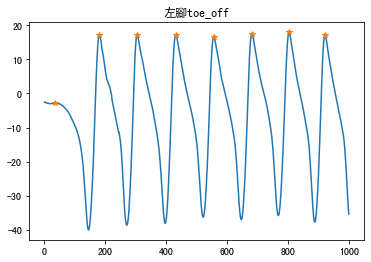

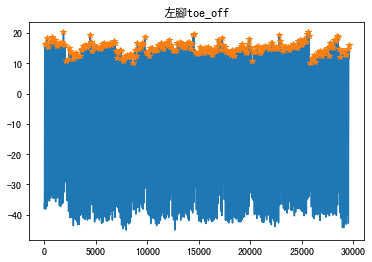

[180, 304, 431, 556, 681, 803, 921, 1039, 1157, 1270, 1396, 1518, 1636, 1757, 1880, 1997, 2122, 2252, 2368, 2493, 2609, 2727, 2848, 2976, 3112, 3246, 3381, 3501, 3617, 3733, 3842, 3959, 4077, 4195, 4308, 4419, 4529, 4641, 4754, 4870, 4986, 5101, 5213, 5323, 5435, 5552, 5670, 5786, 5906, 6017, 6138, 6254, 6365, 6474, 6588, 6705, 6822, 6942, 7060, 7177, 7291, 7404, 7513, 7638, 7749, 7865, 7972, 8072, 8183, 8299, 8418, 8530, 8646, 8756, 8865, 8982, 9099, 9213, 9328, 9449, 9566, 9681, 9798, 9922, 10035, 10153, 10265, 10380, 10501, 10621, 10738, 10869, 10996, 11121, 11239, 11363, 11477, 11603, 11719, 11833, 11944, 12054, 12177, 12296, 12411, 12530, 12643, 12758, 12870, 12992, 13108, 13211, 13334, 13460, 13578, 13694, 13806, 13922, 14038, 14153, 14270, 14387, 14502, 14614, 14732, 14850, 14966, 15080, 15199, 15319, 15433, 15546, 15669, 15794, 15911, 16031, 16145, 16264, 16387, 16504, 16616, 16734, 16852, 16969, 17084, 17200, 17316, 17431, 17543, 17664, 17786, 17900, 18034, 18158, 18270, 18379

In [2]:
#跑圖用
# start=0
# for i in range(6):

#      Rfeet=np.array(oppo_listGRZ[start:start+3000])
#      Rfeet_peaks, _= find_peaks(Rfeet,height=30,distance=30)
#      plt.title("右腳feet_adjacent")
#      plt.plot(Rfeet)
#      plt.plot(Rfeet_peaks, Rfeet[Rfeet_peaks],"*")
#      plt.show()
#      start=start+3000




total_min=1000
listR_toe=[]
listR_feet=[]
listR_tibia=[]
listR_initial=[]
listR_foot=[]
listR_heel=[]
listR__oppo_heel=[]
listtest=[]
listL_toe=[]
listL_feet=[]
listL_tibia=[]
listL_initial=[]
listL_foot=[]
listL_heel=[]
listL__oppo_heel=[]
toe_y=[]
from scipy.signal import find_peaks
#===================================================================
#先抓右腳toe_off
Rtoe=np.array(listMLZ)
Rtoe_peaks, turn_y= find_peaks(Rtoe,distance=60)
# plt.title("右腳toe_off")
# plt.plot(Rtoe)
# plt.plot(Rtoe_peaks, Rtoe[Rtoe_peaks],"*")
# plt.show()

for i in range(len(Rtoe_peaks)):
    if(i>1):
          listR_toe.append(Rtoe_peaks[i])

# for i in range(len(turn_y['peak_heights'])):
#      toe_y.append(int(turn_y['peak_heights'][i]))
# print(toe_y)
for i in listR_toe:
    #if i !=listR_toe[0]: 
        listL_foot.append(i)
#print(listR_toe)
if(total_min>len(listR_toe)):
     total_min=len(listR_toe)

#===================================================================
#左腳toe_off

# start=0
# for i in range(6):

#      Rfeet=np.array(listMRZ[start:start+3000])
#      Rfeet_peaks, _= find_peaks(Rfeet,height=-3,distance=60)
#      plt.title("右腳feet_adjacent")
#      plt.plot(Rfeet)
#      plt.plot(Rfeet_peaks, Rfeet[Rfeet_peaks],"*")
#      plt.show()
#      start=start+3000


Ltoe=np.array(listMRZ[:1000])
Ltoe_peaks, _= find_peaks(Ltoe,height=-10,distance=60)
plt.title("左腳toe_off")
plt.plot(Ltoe)
plt.plot(Ltoe_peaks, Ltoe[Ltoe_peaks],"*")
plt.show()
# flag_insert=0
#print(Ltoe_peaks)
for i in range(len(Ltoe_peaks)):
    if(i!=0):
            listL_toe.append(Ltoe_peaks[i])




Ltoe=np.array(listMRZ[1000:])
Ltoe_peaks, _= find_peaks(Ltoe,height=-3,distance=60)
plt.title("左腳toe_off")
plt.plot(Ltoe)
plt.plot(Ltoe_peaks, Ltoe[Ltoe_peaks],"*")
plt.show()
# flag_insert=0
#print(Ltoe_peaks)
for i in range(len(Ltoe_peaks)):
    #if(i!=0):
            listL_toe.append(Ltoe_peaks[i]+1000)

print(listL_toe)

for i in listL_toe:
    if i !=listL_toe[0]: 
        listR_foot.append(i)

# for i in range(len(Ltoe_peaks)):
#     #if(i!=0):
#     if (listL_toe[i]<12356 and listL_toe[i+1]>12356):
#             flag_insert=i         
# print(flag_insert)
if(total_min>len(listL_toe)):
     total_min=len(listL_toe)

#===================================================================
#右腳feet_adjacent

Rfeet=np.array(oppo_listGRZ)
Rfeet_peaks, _= find_peaks(Rfeet,height=30,distance=30)
# plt.title("右腳feet_adjacent")
# plt.plot(Rfeet)
# plt.plot(Rfeet_peaks, Rfeet[Rfeet_peaks],"*")
# plt.show()
for i in range(len(Rfeet_peaks)):
     if(  i%2==0):
        listR_feet.append(Rfeet_peaks[i])

if(total_min>len(listR_feet)):
     total_min=len(listR_feet)
#print(listR_feet)


#===================================================================
#左腳feet_adjacent
# start=0
# for i in range(6):

#      Lfeet=np.array(oppo_listGLZ[start:start+3000])
#      Lfeet_peaks, _= find_peaks(Lfeet,height=10,distance=60)
#      plt.title("右腳feet_adjacent")
#      plt.plot(Lfeet)
#      plt.axvline(x=1000)
#      plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
#      plt.show()
#      start=start+3000


# Lfeet=np.array(oppo_listGLZ[:2000])
# #判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
# Lfeet_peaks, _= find_peaks(Lfeet,height=10,distance=60)
# #Lfeet_peaks, _= find_peaks(Lfeet,height=40,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.axvline(x=251)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()



Lfeet=np.array(oppo_listGLZ[:15000])
#判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
Lfeet_peaks, _= find_peaks(Lfeet,height=10,distance=40)
#Lfeet_peaks, _= find_peaks(Lfeet,height=40,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.axvline(x=1051)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()

for i in range(len(Lfeet_peaks)):
    #if(i!=0 and i%2==0):
    if( i%2==0):
        listL_feet.append(Lfeet_peaks[i])

#print(listL_feet)


Lfeet=np.array(oppo_listGLZ[15000:])
#判斷用Lfeet=np.array(oppo_listGLZ[3000:4000])
Lfeet_peaks, _= find_peaks(Lfeet,height=30,distance=30)
#Lfeet_peaks, _= find_peaks(Lfeet,height=40,distance=20)
# plt.title("左腳feet_adjacent")
# plt.plot(Lfeet)
# plt.axvline(x=2862)
# plt.plot(Lfeet_peaks, Lfeet[Lfeet_peaks],"*")
# plt.show()
# plt.title("listGLZ")
# plt.plot(listGLZ[:500])
# plt.show()
#print(Lfeet_peaks)
for i in range(len(Lfeet_peaks)):
    #if(i!=0 and i%2==0):
    if( i%2==1):
        listL_feet.append(Lfeet_peaks[i]+15000)
listL_feet.append(2978+15000)       
#print(listL_feet)
if(total_min>len(listL_feet)):
     total_min=len(listL_feet)



#===================================================================
#右腳tibia_vertical
Rtibia=np.array(oppo_listMRZ)
Rtibia_peaks, _= find_peaks(Rtibia,height=30,distance=80)
# plt.title("右腳tibia_vertical")
# plt.plot(Rtibia)
# plt.plot(Rtibia_peaks, Rtibia[Rtibia_peaks],"*")
# plt.show()
#反向對照圖確認用
# plt.plot(listMRZ[:1000])
# plt.show()

for i in range(len(Rtibia_peaks)):
    #if i!=0:
     listR_tibia.append(Rtibia_peaks[i])

if(total_min>len(listR_tibia)):
     total_min=len(listR_tibia)
#print(listR_tibia)
#===================================================================
#左腳tibia_vertical
Ltibia=np.array(oppo_listMLZ)
Ltibia_peaks, _= find_peaks(Ltibia,height=20,distance=80)
# plt.title("左腳tibia_vertical")
# plt.plot(Ltibia)
# plt.plot(Ltibia_peaks, Ltibia[Ltibia_peaks],"*")
# plt.show()
#反向對照圖確認用
# plt.plot(listMLZ[:1000])
# plt.show()
# print(Ltibia_peaks[:10])
for i in range(len(Ltibia_peaks)):
    #if(i>1):
        listL_tibia.append(Ltibia_peaks[i])
#print(listL_tibia)
# for i in range(len(Ltibia_peaks)):
#     if(i):
#         listL_tibia.append(Ltibia_peaks[i])
if(total_min>len(listL_tibia)):
     total_min=len(listL_tibia)

#===================================================================

#右腳initial_contact

# start=0
# for i in range(6):

#      Rinitial=np.array(listGRZ[start:start+3000])
#      Rinitial_peaks, _= find_peaks(Rinitial,height=10,distance=60)
#      plt.title("右腳feet_adjacent")
#      plt.plot(Rinitial)
#      plt.axvline(x=1000)
#      plt.plot(Rinitial_peaks, Rinitial[Rinitial_peaks],"*")
#      plt.show()
#      start=start+3000

Rinitial=np.array(listGRZ)
Rinitial_peaks, _= find_peaks(Rinitial,height=10,distance=70)
# plt.title("右腳initial_contact")
# plt.plot(Rinitial)
# plt.plot(Rinitial_peaks, Rinitial[Rinitial_peaks],"*")
# plt.show()
# print(Rinitial_peaks)
for i in range(len(Rinitial_peaks)):
    #if(i):
        listR_initial.append(Rinitial_peaks[i])


for i in listR_initial: 
    listL__oppo_heel.append(i)


if(total_min>len(listR_initial)):
     total_min=len(listR_initial)



#===================================================================
#左腳initial_contact
Linitial=np.array(listGLZ)
Linitial_peaks, _= find_peaks(Linitial,height=50,distance=70)
# plt.title("左腳initial_contact")
# plt.plot(Linitial)
# plt.plot(Linitial_peaks, Linitial[Linitial_peaks],"*")
# plt.show()
# print(Linitial_peaks)
#print(Linitial_peaks)
for i in range(len(Linitial_peaks)):
    #if(i!=0):
        listL_initial.append(Linitial_peaks[i])

for i in listL_initial: 
    if(i!=listL_initial[0]):
        listR__oppo_heel.append(i)


#print(listL_initial)
if(total_min>len(Linitial_peaks)):
     total_min=len(Linitial_peaks)


#===================================================================
#右腳heel_rise
if (len(listR_toe)>len(listL_toe)):
    heel_rise_len=len(listL_toe)
else:
    heel_rise_len=len(listR_toe) 

for i in range(total_min):
    if(i>0):
        heel_rise_buff=0
        if((listL_foot[i]-listL_tibia[i])%2!=0):
            heel_rise_buff=np.int32((listL_foot[i]-listL_tibia[i])/2+1)
            # print("heel_rise_buff")
            # print(heel_rise_buff)
            listR_heel.append((heel_rise_buff+listL_tibia[i]).astype(int) )
        
        else:
            heel_rise_buff=(listL_foot[i]-listL_tibia[i])/2
            listR_heel.append((heel_rise_buff+listL_tibia[i]) .astype(int))
#listR_heel=np.array(listR_heel)     
#print(listR_heel)

if(total_min>len(listR_heel)):
     total_min=len(listR_heel)
#===================================================================
#左腳heel_rise
if (len(listR_toe)>len(listL_toe)):
    heel_rise_len=len(listL_toe)
else:
    heel_rise_len=len(listR_toe) 

for i in range(total_min):
    heel_rise_buff=0
    if(listR_foot[i]-listR_tibia[i]%2!=0):
        heel_rise_buff=np.int32((listR_foot[i]-listR_tibia[i])/2+1)
        listL_heel.append((heel_rise_buff+listR_tibia[i]).astype(int))

    else:
        heel_rise_buff=np.int32(listR_foot[i]-listR_tibia[i])/2
        listL_heel.append((heel_rise_buff+listR_tibia[i]).astype(int))
#listL_heel=np.array(listL_heel)    
#print(listL_heel)


if(total_min>len(listL_heel)):
     total_min=len(listL_heel)








In [4]:

#==================================
#確認用
# print("==================================")
# print("右腳")
# print("listR_toe:"+str(len(listR_toe)))
# print(listR_toe[:10])
# print("\nlistR_feet:"+str(len(listR_feet)))
# print(listR_feet[:10])
# print("\nlistR_tibia:"+str(len(listR_tibia)))
# print(listR_tibia[:10])
# print("\nlistR_initial:"+str(len(listR_initial)))
# print(listR_initial[:10])
# print("\nlistR_foot:"+str(len(listR_foot)))
# print(listR_foot[:10])
# print("\nlistR_heel:"+str(len(listR_heel)))
# print(listR_heel[:10])
# print("\nlistR_oppo heelrise:"+str(len(listR__oppo_heel)))
# print(listR__oppo_heel[:10])


# print("\n==================================")
# print("左腳")
# print("listL_toe:"+str(len(listL_toe)))
# print(listL_toe[:10])
# print("\nlistL_feet:"+str(len(listL_feet)))
# print(listL_feet[:10])
# print("\nlistL_tibia:"+str(len(listL_tibia)))
# print(listL_tibia[:10])
#print("\nlistL_initial:"+str(len(listL_initial)))
# print(listL_initial[:10])
# print("\nlistL_foot:"+str(len(listL_foot)))
# print(listL_foot[:10])
# print("\nlistL_heel:"+str(len(listL_heel)))
# print(listL_heel[:10])
# print("\nlistL_oppo heelrise:"+str(len(listL__oppo_heel)))
# print(listL__oppo_heel[:10])
print("\ntotal_min :")
print(total_min)

右腳
listR_toe:259
[244, 369, 495, 619, 741, 865, 980, 1098, 1214, 1333]

listR_feet:261
[134, 258, 383, 477, 570, 694, 817, 934, 1052, 1170]

listR_tibia:258
[145, 270, 396, 521, 646, 768, 887, 1004, 1123, 1235]

listR_initial:260
[166, 292, 417, 542, 666, 788, 907, 1026, 1143, 1258]

listR_foot:259
[304, 431, 556, 681, 803, 921, 1039, 1157, 1270, 1396]

listR_heel:257
[290, 415, 541, 664, 787, 907, 1023, 1139, 1258, 1378]

listR_oppo heelrise:259
[232, 356, 483, 607, 729, 853, 969, 1086, 1202, 1321]

total_min :
257


存檔用

In [7]:
import csv
import pandas as pd
#格式
key=["Rtoe_off","Rfeet_adjacent","Rtibia_vertical","Rinitial_contact","Rfoot_flat","Rheel_rise","R__oppo_heel","Ltoe_off","Lfeet_adjacent","Ltibia_vertical","Linitial_contact","Lfoot_flat","Lheel_rise","L__oppo_heel"]
#儲存內容
r=zip(listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listR_heel,listR__oppo_heel,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listL_heel,listL__oppo_heel)
path=r"林O成改(手動切割)"
with open(f'{path}.csv', "w",newline='') as s:
    w = csv.writer(s)
    w.writerow(key)
    for row in r:
        w.writerow(row)


df = pd.read_csv(f'{path}.csv')
df.to_excel(f'{path}.xlsx', index=None, header=True)

In [8]:
listR_toe=[]
listR_feet=[]
listR_tibia=[]
listR_initial=[]
listR_foot=[]
listR_heel=[]
listR__oppo_heel=[]
listtest=[]
listL_toe=[]
listL_feet=[]
listL_tibia=[]
listL_initial=[]
listL_foot=[]
listL_heel=[]
listL__oppo_heel=[]

												
df=pd.read_excel("林O成改(手動切割).xlsx",keep_default_na=False)
listR_toe=df.Rtoe_off.tolist()
listR_feet=df.Rfeet_adjacent.tolist()
listR_tibia=df.Rtibia_vertical.tolist()
listR_initial=df.Rinitial_contact.tolist()
listR_foot=df.Rfoot_flat.tolist()
listR_heel=df.Rheel_rise.tolist()
listR__oppo_heel=df.R__oppo_heel.tolist()

listL_toe=df.Ltoe_off.tolist()
listL_feet=df.Lfeet_adjacent.tolist()
listL_tibia=df.Ltibia_vertical.tolist()
listL_initial=df.Linitial_contact.tolist()
listL_foot=df.Lfoot_flat.tolist()
listL_heel=df.Lheel_rise.tolist()
listL__oppo_heel=df.L__oppo_heel.tolist()



In [9]:
for i in range(len(listR_toe)):
    if(listR_toe[i]>listR_feet[i]):
        print(1)

In [10]:
print(len(listR_toe))
print(len(listR_feet))
print(len(listR_tibia))
print(len(listR_initial))

126
126
126
126


各個步態參數

In [11]:
listR_initial_swing=[]	
listR_mid_swing=[]	
listR_terminal_swing=[]	
listR_loading_response=[]	
listR_mid_stance=[]	
listR_terminal_stance=[]	
listR_pre_swing=[]
listR_one_response=[]
listR_two_response=[]
listR_one_distance=[]
listR_two_distance=[]
listR_swing_phase=[]
listR_stance_phase=[]




listL_initial_swing=[]	
listL_mid_swing=[]	
listL_terminal_swing=[]	
listL_loading_response=[]	
listL_mid_stance=[]	
listL_terminal_stance=[]	
listL_pre_swing=[]
listL_one_response=[]
listL_two_response=[]
listL_one_distance=[]
listL_two_distance=[]
listL_swing_phase=[]
listL_stance_phase=[]



total_min=126

Rgait=[]
Lgait=[]

for i in range(total_min-1):
    Rgait.append(listR_toe[i+1]-listR_toe[i])
    listR_two_distance.append(Rgait[i]/100)
    
if(total_min>len(listR_two_distance)):
       total_min=len(listR_two_distance)

for i in range(total_min-1):
    if(listR_toe[i]>listL_toe[i]):
       listR_one_distance.append(abs(listR_toe[i]-listL_toe[i+1])/100) 

if(total_min>len(listR_one_distance)):
       total_min=len(listR_one_distance)


for i in range(total_min-1):
    Lgait.append(listL_toe[i+1]-listL_toe[i])
    listL_two_distance.append(Lgait[i]/100)

if(total_min>len(listL_two_distance)):
       total_min=len(listL_two_distance)



for i in range(total_min-1):
    listL_one_distance.append(abs(listL_toe[i]-listR_toe[i])/100) 

if(total_min>len(listL_one_distance)):
       total_min=len(listL_one_distance)

#print(listL_one_distance)


gait_len=total_min
# print(len(listR_one_distance))
# print(len(listL_two_distance))

def R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel):
    for i in range(gait_len):

        x=(listR_feet[i]-listR_toe[i])/Rgait[i]*100
        x=round(x, 2)
        # print(listR_toe[i+1])
        # print(listR_feet[i])
        listR_initial_swing.append(x)
        # print(listR_tibia[i])
        # print(listR_feet[i])
        x=(listR_tibia[i]-listR_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_swing.append(x)

        x=(listR_initial[i]-listR_tibia[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_swing.append(x)

        x=(listR_foot[i]-listR_initial[i])/Rgait[i]*100
        x=round(x, 2)
        listR_loading_response.append(x)

        x=(listL_feet[i+1]-listR_foot[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_stance.append(x)
        # print(listL_feet[i])
        # print(listR_foot[i])
        #print(x)
        x=(listR__oppo_heel[i]-listL_feet[i+1])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_stance.append(x)
        

        x=(listR_toe[i+1]-listR__oppo_heel[i])/Rgait[i]*100
        x=round(x, 2)
        listR_pre_swing.append(x)
 
        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i]+listR_mid_stance[i]+listR_terminal_stance[i])
        x=round(x, 2)
        listR_one_response.append(x)

        x=(listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_two_response.append(x)

        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i])
        x=round(x, 2)
        listR_swing_phase.append(x)

        x=(listR_mid_stance[i]+listR_terminal_stance[i]+listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_stance_phase.append(x)
        

    return listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase



def L_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel):
    
    listR_initial_swing=[]	
    listR_mid_swing=[]	
    listR_terminal_swing=[]	
    listR_loading_response=[]	
    listR_mid_stance=[]	
    listR_terminal_stance=[]	
    listR_pre_swing=[]
    listR_one_response=[]
    listR_two_response=[]
    listR_swing_phase=[]
    listR_stance_phase=[]

    for i in range(total_min):

        x=(listR_feet[i]-listR_toe[i])/Rgait[i]*100
        x=round(x, 2)
        listR_initial_swing.append(x)

        x=(listR_tibia[i]-listR_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_swing.append(x)

        x=(listR_initial[i]-listR_tibia[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_swing.append(x)

        x=(listR_foot[i]-listR_initial[i])/Rgait[i]*100
        x=round(x, 2)
        listR_loading_response.append(x)

        x=(listL_feet[i]-listR_foot[i])/Rgait[i]*100
        x=round(x, 2)
        listR_mid_stance.append(x)

        x=(listR__oppo_heel[i]-listL_feet[i])/Rgait[i]*100
        x=round(x, 2)
        listR_terminal_stance.append(x)
        # print("listR__oppo_heel[i]================")
        # print(listR__oppo_heel[0])
        # print("listL_feet[i]================")
        # print(listL_feet[0])
        # print("listR__oppo_heel[i]================")
        # print(listR__oppo_heel[55])
        # print("listL_feet[i]================")
        # print(listL_feet[55])

        x=(listR_toe[i+1]-listR__oppo_heel[i])/Rgait[i]*100
        x=round(x, 2)
        listR_pre_swing.append(x)
 
        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i]+listR_mid_stance[i]+listR_terminal_stance[i])
        x=round(x, 2)
        listR_one_response.append(x)

        x=(listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_two_response.append(x)

        x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i])
        x=round(x, 2)
        listR_swing_phase.append(x)

        x=(listR_mid_stance[i]+listR_terminal_stance[i]+listR_loading_response[i]+listR_pre_swing[i])
        x=round(x, 2)
        listR_stance_phase.append(x)
        
        #回傳
        #

    return listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase





listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase=R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel)
#
listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_swing_phase,listL_stance_phase=L_gaitpie(gait_len,Lgait,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listR_feet,listL__oppo_heel)


# print(len(listR_initial_swing))

# print(len(listL_initial_swing))


In [12]:
print(total_min)

122


In [13]:
# #單支撐one_response、雙支撐two_response、步長時間one_distance、步幅時間two_distance
# listR_initial_swing=[]	
# listR_mid_swing=[]	
# listR_terminal_swing=[]	
# listR_loading_response=[]	
# listR_mid_stance=[]	
# listR_terminal_stance=[]	
# listR_pre_swing=[]
# listR_one_response=[]
# listR_two_response=[]
# listR_one_distance=[]
# listR_two_distance=[]
# listR_swing_phase=[]
# listR_stance_phase=[]




# listL_initial_swing=[]	
# listL_mid_swing=[]	
# listL_terminal_swing=[]	
# listL_loading_response=[]	
# listL_mid_stance=[]	
# listL_terminal_stance=[]	
# listL_pre_swing=[]
# listL_one_response=[]
# listL_two_response=[]
# listL_one_distance=[]
# listL_two_distance=[]
# listL_swing_phase=[]
# listL_stance_phase=[]



# total_min=234
# flag_total_min=10000
# Rgait=[]
# Lgait=[]

# #一秒鐘100點來算 直接拿下一步減掉當下就能抓出花了多少點，再將點數/100就為所花費
# for i in range(total_min-1):
#     Rgait.append(listR_toe[i+1]-listR_toe[i])
#     listR_two_distance.append(Rgait[i]/100)


# if(flag_total_min>len(listR_two_distance)):
#        flag_total_min=len(listR_two_distance)


# #一秒鐘100點來算 比右腳點數大一點的左腳來算
# for i in range(total_min-1):
#     if(listR_toe[i]>listL_toe[i]):
#         listR_one_distance.append(abs(listR_toe[i]-listL_toe[i+1])/100)
#     else:
#         listR_one_distance.append(abs(listR_toe[i]-listL_toe[i])/100)

# if(flag_total_min>len(listR_one_distance)):
#        flag_total_min=len(listR_one_distance)


# for i in range(total_min-1):
#     Lgait.append(listL_toe[i+1]-listL_toe[i])
#     listL_two_distance.append(Lgait[i]/100)

# if(flag_total_min>len(listL_two_distance)):
#        flag_total_min=len(listL_two_distance)



# for i in range(total_min-1):
#     if(listR_toe[i]>listL_toe[i]):
#         listL_one_distance.append(abs(listR_toe[i]-listL_toe[i])/100)
#     else:
#         listL_one_distance.append(abs(listR_toe[i+1]-listL_toe[i])/100)
   
# if(flag_total_min>len(listL_one_distance)):
#        flag_total_min=len(listL_one_distance)
# # print(flag_total_min)
# # print(len(Rgait))
# #print(listL_one_distance)


# gait_len=flag_total_min-1
# # print(len(listR_one_distance))
# # print(len(listL_two_distance))

# def R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel):
#     for i in range(gait_len):

#         x=(listR_feet[i]-listR_toe[i])/Rgait[i]*100
#         x=round(x, 2)
#         # print(listR_toe[i+1])
#         # print(listR_feet[i])
#         listR_initial_swing.append(x)
#         # print(listR_tibia[i])
#         # print(listR_feet[i])
#         x=(listR_tibia[i]-listR_feet[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_mid_swing.append(x)

#         x=(listR_initial[i]-listR_tibia[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_terminal_swing.append(x)

#         x=(listR_foot[i]-listR_initial[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_loading_response.append(x)

#         x=(listL_feet[i]-listR_foot[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_mid_stance.append(x)
#         # print(listL_feet[i])
#         # print(listR_foot[i])
#         #print(x)
#         x=(listR__oppo_heel[i]-listL_feet[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_terminal_stance.append(x)
        

#         x=(listR_toe[i+1]-listR__oppo_heel[i])/Rgait[i]*100
#         x=round(x, 2)
#         listR_pre_swing.append(x)
 
#         x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i]+listR_mid_stance[i]+listR_terminal_stance[i])
#         x=round(x, 2)
#         listR_one_response.append(x)

#         x=(listR_loading_response[i]+listR_pre_swing[i])
#         x=round(x, 2)
#         listR_two_response.append(x)

#         x=(listR_initial_swing[i]+listR_mid_swing[i]+listR_terminal_swing[i])
#         x=round(x, 2)
#         listR_swing_phase.append(x)

#         x=(listR_mid_stance[i]+listR_terminal_stance[i]+listR_loading_response[i]+listR_pre_swing[i])
#         x=round(x, 2)
#         listR_stance_phase.append(x)
        

#     return listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase



# def L_gaitpie(gait_len,Lgait,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listR_feet,listL__oppo_heel):
    
#     listL_initial_swing=[]	
#     listL_mid_swing=[]	
#     listL_terminal_swing=[]	
#     listL_loading_response=[]	
#     listL_mid_stance=[]	
#     listL_terminal_stance=[]	
#     listL_pre_swing=[]
#     listL_one_response=[]
#     listL_two_response=[]
#     listL_swing_phase=[]
#     listL_stance_phase=[]

#     for i in range(gait_len):

#         x=(listL_feet[i]-listL_toe[i])/Lgait[i]*100
#         x=round(x, 2)
#         listL_initial_swing.append(x)
#         # print("listL_feet[i]================")
#         # print(listL_feet[0])
#         # print("listL_toe[i]================")
#         # print(listL_toe[0])



#         x=(listL_tibia[i]-listL_feet[i])/Lgait[i]*100
#         x=round(x, 2)
#         listL_mid_swing.append(x)

#         x=(listL_initial[i]-listL_tibia[i])/Lgait[i]*100
#         x=round(x, 2)
#         listL_terminal_swing.append(x)

#         x=(listL_foot[i]-listL_initial[i])/Lgait[i]*100
#         x=round(x, 2)
#         listL_loading_response.append(x)

#         x=(listR_feet[i+1]-listL_foot[i])/Lgait[i]*100
#         # print("listR_feet[i]================")
#         # print(listR_feet[0])
#         # print("listL_foot[i]================")
#         # print(listL_foot[0])
#         x=round(x, 2)
#         listL_mid_stance.append(x)

#         x=(listL__oppo_heel[i+1]-listR_feet[i+1])/Lgait[i]*100
#         x=round(x, 2)
#         listL_terminal_stance.append(x)
#         # print("listR__oppo_heel[i]================")
#         # print(listR__oppo_heel[0])
#         # print("listL_feet[i]================")
#         # print(listL_feet[0])
#         # print("listR__oppo_heel[i]================")
#         # print(listR__oppo_heel[55])
#         # print("listL_feet[i]================")
#         # print(listL_feet[55])

#         x=(listL_toe[i+1]-listL__oppo_heel[i+1])/Lgait[i]*100
#         x=round(x, 2)
#         listL_pre_swing.append(x)
 
#         x=(listL_initial_swing[i]+listL_mid_swing[i]+listL_terminal_swing[i]+listL_mid_stance[i]+listL_terminal_stance[i])
#         x=round(x, 2)
#         listL_one_response.append(x)

#         x=(listL_loading_response[i]+listL_pre_swing[i])
#         x=round(x, 2)
#         listL_two_response.append(x)

#         x=(listL_initial_swing[i]+listL_mid_swing[i]+listL_terminal_swing[i])
#         x=round(x, 2)
#         listL_swing_phase.append(x)

#         x=(listL_mid_stance[i]+listL_terminal_stance[i]+listL_loading_response[i]+listL_pre_swing[i])
#         x=round(x, 2)
#         listL_stance_phase.append(x)
        
#         #回傳
#         #

#     return listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_swing_phase,listL_stance_phase





# listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_swing_phase,listR_stance_phase=R_gaitpie(gait_len,Rgait,listR_toe,listR_feet,listR_tibia,listR_initial,listR_foot,listL_feet,listR__oppo_heel)
# #
# listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_swing_phase,listL_stance_phase=L_gaitpie(gait_len,Lgait,listL_toe,listL_feet,listL_tibia,listL_initial,listL_foot,listR_feet,listL__oppo_heel)
# print(1)

# # print(len(listR_initial_swing))

# # print(len(listL_initial_swing))


In [14]:
# print("listR__oppo_heel[54]================")
# print(listR__oppo_heel[54])
# print("listL_feet[55]================")
# print(listL_feet[55])

# print(listR__oppo_heel[54]-listL_feet[55])

# print("listR__oppo_heel[55]================")
# print(listR__oppo_heel[55])
# print("listL_feet[56]================")
# print(listL_feet[56])

# print(listR__oppo_heel[55]-listL_feet[56])

# print("listR__oppo_heel[56]================")
# print(listR__oppo_heel[56])
# print("listL_feet[57]================")
# print(listL_feet[57])

# print(listR__oppo_heel[56]-listL_feet[57])

In [15]:
# 確認用
# print("==================================")
# 判斷每次剪完後是否有負數
# print("initial_swing"+str(listL_initial_swing))

# print("mid_swing"+str(listL_mid_swing))

# print("terminal_swing"+str(listL_terminal_swing) )

# print("loading_response"+str(listL_loading_response))

# print("mid_stance"+str(listL_mid_stance))

# print("terminal_stance"+str(listL_terminal_stance))

# print("pre_swing"+str(listL_pre_swing))

# print("one_response"+str(listL_one_response))

# print("two_response"+str(listL_two_response))

# print("swing_phase"+str(listL_swing_phase))

# print("stance_phase"+str(listL_stance_phase))


#有的話印出來
# for i in range(len(listR_initial_swing)):
#     if(listR_initial_swing[i]<=0):
#         print("initial_swing:"+str(i))

#     if(listR_mid_swing[i]<=0):
#         print("mid_swing:"+str(i))

#     if(listR_terminal_swing[i]<=0):
#         print("terminal_swing:"+str(i))

#     if(listR_loading_response[i]<=0):
#         print("loading_response:"+str(i))

#     if(listR_mid_stance[i]<=0):
#         print("mid_stance:"+str(i))

#     if(listR_terminal_stance[i]<=0):
#         print("terminal_stance:"+str(i))

#     if(listR_pre_swing[i]<=0):
#         print("pre_swing:"+str(i))
         
    # if(listR_swing_phase[i]+listR_stance_phase[i]!=100):
    #     print(100-listR_swing_phase[i]-listR_stance_phase[i])
         


存步態占比

In [16]:
import csv
import pandas as pd
#格式
key=["R_initial_swing","R_mid_swing","R_terminal_swing","R_loading_response","R_mid_stance","R_terminal_stance","R_pre_swing","R_one_response","R_two_response","R_one_distance","R_two_distance","R_swing_phase","R_stance_phase","L_initial_swing","L_mid_swing","L_terminal_swing","L_loading_response","L_mid_stance","L_terminal_stance","L_pre_swing","L_one_response","L_two_response","L_one_distance","L_two_distance","L_swing_phase","L_stance_phase"]
#
#
#儲存內容
r=zip(listR_initial_swing,listR_mid_swing,listR_terminal_swing,listR_loading_response,listR_mid_stance,listR_terminal_stance,listR_pre_swing,listR_one_response,listR_two_response,listR_one_distance,listR_two_distance,listR_swing_phase,listR_stance_phase,listL_initial_swing,listL_mid_swing,listL_terminal_swing,listL_loading_response,listL_mid_stance,listL_terminal_stance,listL_pre_swing,listL_one_response,listL_two_response,listL_one_distance,listL_two_distance,listL_swing_phase,listL_stance_phase)
path=r"測試占比"
with open(f'{path}.csv', "w",newline='') as s:
    w = csv.writer(s)
    w.writerow(key)
    for row in r:
        w.writerow(row)


df = pd.read_csv(f'{path}.csv')
df.to_excel(f'{path}.xlsx', index=None, header=True)

以下是一个示例代码，展示如何读取CSV文件并检查所有值是否小于0，而第一行是字符串：

存檔用

In [17]:
import csv

# 打开CSV文件
with open('測試占比.csv', newline='') as csvfile:
    # 创建CSV读取器
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # 读取CSV文件中的第一行，保存为header列表
    header = next(reader)
    
    # 遍历CSV文件中的每一行
    for row in reader:
        # 遍历该行中的每个值，从第二个值开始
        for i, value in enumerate(row[1:]):
            # 将值转换为浮点数
            float_value = float(value)
            
            # 如果值小于0，进行相应的处理
            if float_value <= 0:
                print(f"在行 {reader.line_num} 列 {i+2} 中发现小于0的值: {value}")